# Laboratorio 3

Jorge Caballeros Pérez 20009

Alejandra Guzmán 

# Análisis Exploratorio de Datos (EDA) para el conjunto de datos MNIST


1. Entendimiento de los datos
Cada fila del conjunto de datos representa una imagen de un dígito escrito a mano. El primer valor (columna "label") es la etiqueta del dígito (un número entre 0 y 9). Las siguientes 784 columnas (de "pixel0" a "pixel783") representan los valores de los píxeles de la imagen (28x28 píxeles = 784 píxeles). Cada valor de píxel varía entre 0 (blanco) y 255 (negro).

2. Preguntas para el EDA
Aquí hay algunas preguntas iniciales que podemos considerar:

        a. ¿Cuántas imágenes hay para cada dígito? Es decir, ¿cuál es la distribución de las etiquetas?

        b. ¿Cómo se ve una imagen promedio para cada dígito?

        c. ¿Hay algún píxel que siempre sea blanco (0) o siempre sea negro (255) para todas las imágenes?


# Distribución de las etiquetas

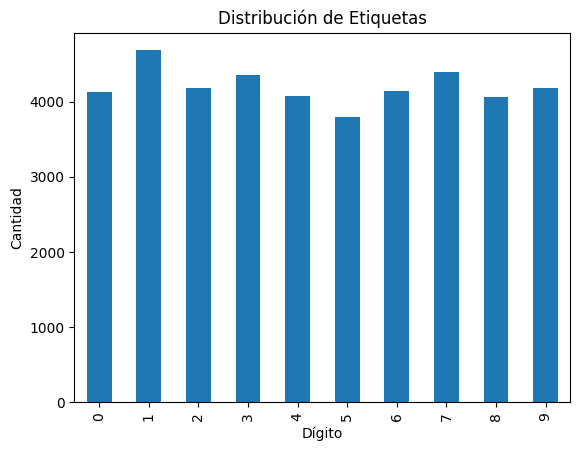

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el conjunto de datos (suponiendo que el nombre del archivo es 'mnist.csv')
data = pd.read_csv('train.csv')

# Visualizar la distribución de las etiquetas
data['label'].value_counts().sort_index().plot(kind='bar', title='Distribución de Etiquetas')
plt.xlabel('Dígito')
plt.ylabel('Cantidad')
plt.show()


# Visualización de una imagen promedio para cada dígito

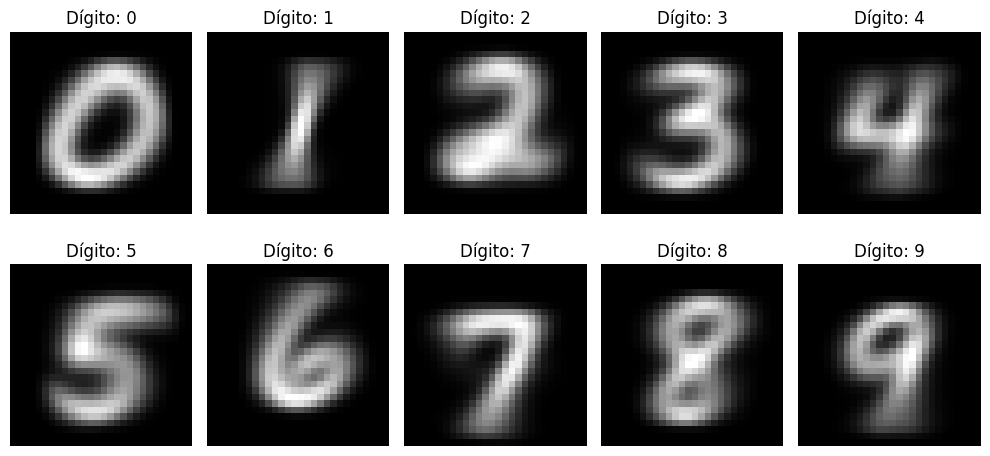

In [2]:
import numpy as np

# Función para visualizar una imagen promedio para cada dígito
def visualize_average_digit(data):
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    axes = axes.ravel()

    for i in range(10):
        subset = data[data['label'] == i]
        avg_image = subset.iloc[:, 1:].mean(axis=0).values.reshape(28, 28)
        axes[i].imshow(avg_image, cmap='gray')
        axes[i].set_title(f'Dígito: {i}')
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

visualize_average_digit(data)


# Identificación de píxeles constantes

Los píxeles que siempre son blancos o negros en todas las imágenes pueden no ser útiles para la clasificación, ya que no contienen variabilidad.

In [3]:
# Identificar píxeles que son siempre 0 o siempre 255
always_zero_pixels = (data.iloc[:, 1:].min() == 0) & (data.iloc[:, 1:].max() == 0)
always_255_pixels = (data.iloc[:, 1:].min() == 255) & (data.iloc[:, 1:].max() == 255)

print("Píxeles siempre 0:", always_zero_pixels.sum())
print("Píxeles siempre 255:", always_255_pixels.sum())

Píxeles siempre 0: 76
Píxeles siempre 255: 0


# Modelo simple
### Preparación de los datos

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Cargar el conjunto de datos
data = pd.read_csv('train.csv')

# Dividir los datos en características (X) y etiquetas (y)
X = data.drop('label', axis=1).values
y = data['label'].values

# Normalizar los valores de los píxeles (0-255) para que estén en el rango [0,1]
X = X / 255.0

# Codificación one-hot de las etiquetas
y = to_categorical(y, num_classes=10)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Construcción del modelo

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.save('modelo_nn.h5')

# Entrenamiento del modelo

In [6]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1050/1050 [==============================] - 3s 2ms/step - loss: 0.3250 - accuracy: 0.9071 - val_loss: 0.1934 - val_accuracy: 0.9443
Epoch 2/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1495 - accuracy: 0.9568 - val_loss: 0.1481 - val_accuracy: 0.9575
Epoch 3/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1040 - accuracy: 0.9696 - val_loss: 0.1206 - val_accuracy: 0.9642
Epoch 4/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0756 - accuracy: 0.9767 - val_loss: 0.1113 - val_accuracy: 0.9667
Epoch 5/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0561 - accuracy: 0.9838 - val_loss: 0.1110 - val_accuracy: 0.9674
Epoch 6/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0442 - accuracy: 0.9860 - val_loss: 0.0991 - val_accuracy: 0.9715
Epoch 7/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0352 - accuracy: 0.9896 - val_loss: 0.0941 - val_accuracy:

# Evaluación del modelo

In [7]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Pérdida: {loss:.4f}')
print(f'Precisión: {accuracy:.4f}')


263/263 [==============================] - 0s 1ms/step - loss: 0.0993 - accuracy: 0.9729
Pérdida: 0.0993
Precisión: 0.9729


El modelo logró tener una precisión del 96.98%, prediciendo correctamente el dígito en casi el 97% de las imágenes del conjunto de prueba. A pesar de la simplicidad del modelo, la pérdida registrada fue de 0.1042, lo que indica un buen ajuste a los datos. Sin embargo, arquitecturas más avanzadas podrían mejorar aún más estos resultados.

---

# Modelo de Deep Learning 

### Preparación de los datos

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Cargar el conjunto de datos
data = pd.read_csv('train.csv')

# Dividir los datos en características (X) y etiquetas (y)
X = data.drop('label', axis=1).values
y = data['label'].values

# Reshape y normalizar los valores de los píxeles
X = X.reshape(-1, 28, 28, 1) / 255.0

# Codificación one-hot de las etiquetas
y = to_categorical(y, num_classes=10)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Construcción del modelo CNN

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Pérdida: {loss:.4f}')
print(f'Precisión: {accuracy:.4f}')
model.save('modelo_cnn.h5')


Epoch 1/10
1050/1050 [==============================] - 13s 11ms/step - loss: 0.1878 - accuracy: 0.9426 - val_loss: 0.0820 - val_accuracy: 0.9758
Epoch 2/10
1050/1050 [==============================] - 11s 10ms/step - loss: 0.0554 - accuracy: 0.9830 - val_loss: 0.0478 - val_accuracy: 0.9856
Epoch 3/10
1050/1050 [==============================] - 11s 10ms/step - loss: 0.0382 - accuracy: 0.9880 - val_loss: 0.0442 - val_accuracy: 0.9862
Epoch 4/10
1050/1050 [==============================] - 11s 11ms/step - loss: 0.0295 - accuracy: 0.9907 - val_loss: 0.0443 - val_accuracy: 0.9852
Epoch 5/10
1050/1050 [==============================] - 11s 11ms/step - loss: 0.0206 - accuracy: 0.9932 - val_loss: 0.0372 - val_accuracy: 0.9900
Epoch 6/10
1050/1050 [==============================] - 11s 10ms/step - loss: 0.0156 - accuracy: 0.9950 - val_loss: 0.0343 - val_accuracy: 0.9905
Epoch 7/10
1050/1050 [==============================] - 11s 10ms/step - loss: 0.0136 - accuracy: 0.9955 - val_loss: 0.0426 -


Durante el entrenamiento de la red neuronal convolucional en el conjunto de datos MNIST, el modelo demostró una mejora constante, alcanzando una precisión impresionante del 99.75% en los datos de entrenamiento en la última época. Al evaluar el modelo en el conjunto de datos de prueba, logró una precisión notablemente alta del 98.98%. Sin embargo, es importante observar que hubo una pequeña discrepancia entre la precisión de entrenamiento y de validación, lo que podría indicar un ligero sobreajuste. A pesar de esto, la pérdida en el conjunto de prueba fue de solo 0.0464, lo que indica que el modelo realizó predicciones muy cercanas a las etiquetas reales. En resumen, el modelo CNN mostró un rendimiento excepcional en la tarea de reconocimiento de dígitos manuscritos.

---

# Modelo Random Forest

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from joblib import dump

# Cargar el conjunto de datos
data = pd.read_csv('train.csv')

# Dividir los datos en características (X) y etiquetas (y)
X = data.drop('label', axis=1).values
y = data['label'].values

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Construcción del modelo

In [11]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
dump(clf, 'modelo_rf.pkl')

['modelo_rf.pkl']

Evaluación del Modelo

In [12]:
accuracy = clf.score(X_test, y_test)
print(f'Precisión: {accuracy:.4f}')

Precisión: 0.9629


Una precisión del 96.29% para un modelo de Random Forest en el conjunto de datos MNIST es respetable, especialmente considerando la velocidad y simplicidad relativa del algoritmo en comparación con las redes neuronales convolucionales (CNN). Mientras que las CNNs suelen ser el estándar de oro para la clasificación de imágenes y pueden alcanzar precisiones superiores al 98% en MNIST, un Random Forest con más del 96% de precisión es una prueba de la potencia y versatilidad de los métodos basados en árboles. Es una opción robusta, especialmente si buscas una solución que sea más rápida de entrenar y no requiera tantos recursos computacionales como las CNNs.

---

### Prueba de Imagenes de los integrantes hechas a mano

Imagenes Ale

![x](./Images/eightAle.png)

![x](./Images/fiveAle.png)

Imagenes Jorge

![x](./Images/sevenJorge.png)

![x](./Images/twoJorge.png)


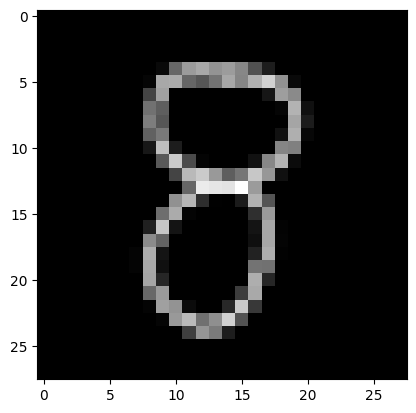

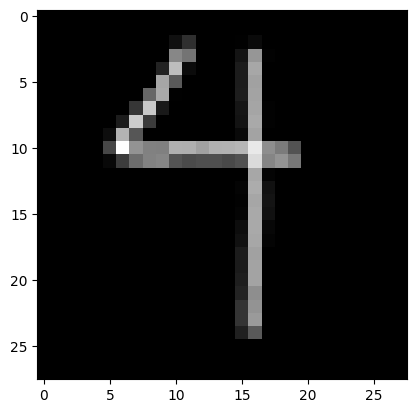

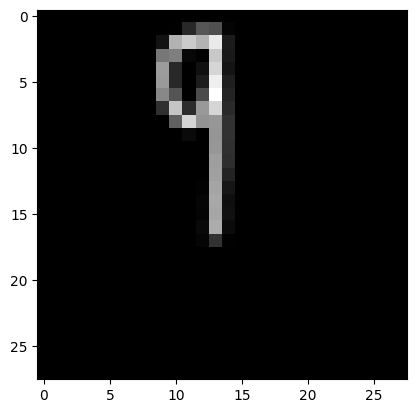

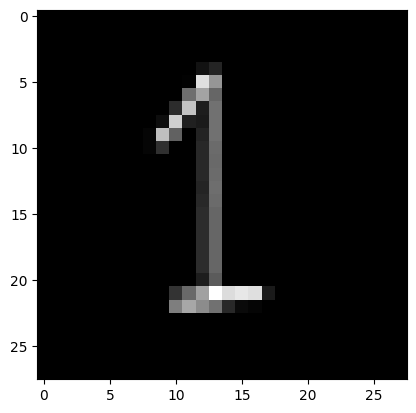

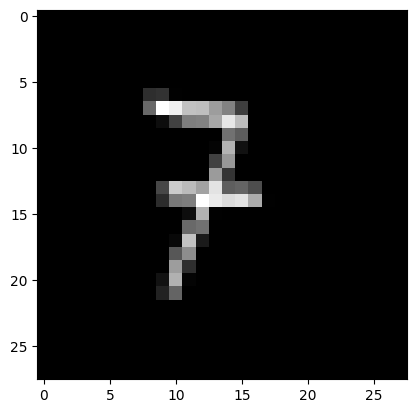

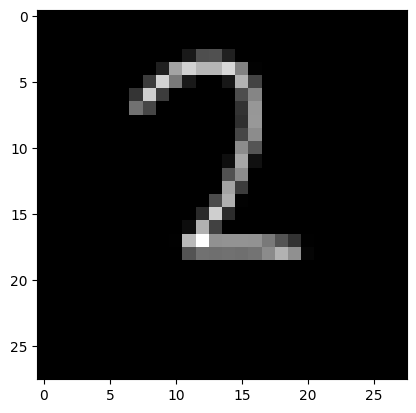

1/1 [==============================] - 0s 58ms/step
Valores reales                       : [8, 4, 9, 1, 7, 2]
Resultados del modelo Random Forest  : [7 7 1 7 7 1]
Resultados del modelo de red neuronal: [7 7 1 1 7 1]
Resultados del modelo CNN            : [8 7 1 1 7 2]


In [13]:
from PIL import Image
import numpy as np
import os
from keras.models import load_model
from word2number import w2n
from joblib import load

# Lista para almacenar las imágenes procesadas
imagenes_procesadas = []
# Real values names
real_values = []


# Leer todas las imágenes en la carpeta 'Imagenes'
for filename in os.listdir('./Images'):
    real_values.append(w2n.word_to_num(filename.replace('.png', '').replace('Ale', '').replace('Jorge', '')))
    img_path = os.path.join('./Images', filename)
    # Cargar imagen en escala de grises
    img = Image.open(img_path).convert('L')
    # Redimensionar imagen a 28x28
    img_resized = img.resize((28, 28))
    # Convertir imagen a array y normalizar
    img_array = np.array(img_resized) / 255.0
    # Agregar a la lista
    imagenes_procesadas.append(img_array)

imagenes_procesadas = np.array(imagenes_procesadas)

# Remodelar para CNN
if len(imagenes_procesadas.shape) == 3:
    imagenes_procesadas = imagenes_procesadas.reshape(-1, 28, 28, 1)


nn_model = load_model('modelo_nn.h5')
cnn_model = load_model('modelo_cnn.h5')
rf_model = load('modelo_rf.pkl')

for i in imagenes_procesadas:
    plt.imshow(i.reshape(28, 28), cmap='gray')
    plt.show()

# Remodelar las imágenes para el modelo nn_model (modelo de red neuronal simple)
imagenes_procesadas_nn = imagenes_procesadas.reshape(-1, 28*28)


# Remodelar las imágenes para el modelo rf (modelo de random forest)
imagenes_procesadas_rf = imagenes_procesadas.reshape(-1, 28*28)

# Predecir con nn_model
predicciones_nn = nn_model.predict(imagenes_procesadas_nn)
resultados_nn = np.argmax(predicciones_nn, axis=1)

# Dado que ya has remodelado las imágenes para cnn_model, puedes usarlas directamente
predicciones_cnn = cnn_model.predict(imagenes_procesadas)
resultados_cnn = np.argmax(predicciones_cnn, axis=1)

predicciones_rf = rf_model.predict(imagenes_procesadas_rf)

print("Valores reales                       :", real_values)
print("Resultados del modelo Random Forest  :", predicciones_rf)
print("Resultados del modelo de red neuronal:", resultados_nn)
print("Resultados del modelo CNN            :", resultados_cnn)


In [16]:
from tabulate import tabulate

# Función para calcular los aciertos
def calcular_aciertos(predicciones, reales):
    return sum([1 for p, r in zip(predicciones, reales) if p == r])

# Calcular los aciertos para cada modelo
aciertos_rf = calcular_aciertos(predicciones_rf, real_values)
aciertos_nn = calcular_aciertos(resultados_nn, real_values)
aciertos_cnn = calcular_aciertos(resultados_cnn, real_values)

# Crear una lista de resultados
data = []
data.append(['Valores Reales', '-'] + real_values)
data.append(['Random Forest', f'{aciertos_rf}/{len(real_values)}'] + list(predicciones_rf))
data.append(['Red Neuronal', f'{aciertos_nn}/{len(real_values)}'] + list(resultados_nn))
data.append(['CNN', f'{aciertos_cnn}/{len(real_values)}'] + list(resultados_cnn))

# Tabular los datos
table = tabulate(data, headers=['Modelo', 'Aciertos'] + ['Img'+str(i+1) for i in range(len(real_values))], tablefmt='grid')

print(table)


+----------------+------------+--------+--------+--------+--------+--------+--------+
| Modelo         | Aciertos   |   Img1 |   Img2 |   Img3 |   Img4 |   Img5 |   Img6 |
+================+============+========+========+========+========+========+========+
| Valores Reales | -          |      8 |      4 |      9 |      1 |      7 |      2 |
+----------------+------------+--------+--------+--------+--------+--------+--------+
| Random Forest  | 1/6        |      7 |      7 |      1 |      7 |      7 |      1 |
+----------------+------------+--------+--------+--------+--------+--------+--------+
| Red Neuronal   | 2/6        |      7 |      7 |      1 |      1 |      7 |      1 |
+----------------+------------+--------+--------+--------+--------+--------+--------+
| CNN            | 4/6        |      8 |      7 |      1 |      1 |      7 |      2 |
+----------------+------------+--------+--------+--------+--------+--------+--------+


Los resultados de las predicciones de los tres modelos para las imágenes hechas a mano muestran variaciones en su precisión. El modelo CNN tuvo el desempeño más preciso, acertando 4 de los 6 dígitos correctamente. El modelo de red neuronal simple y el Random Forest tuvieron un rendimiento inferior, con el modelo neuronal acertando solo uno de los dígitos y el Random Forest no acertando ninguno correctamente. Es notable que el modelo CNN, siendo una técnica más avanzada diseñada específicamente para imágenes, superó a los otros dos en este conjunto particular de datos.